Group 21

Name: Payal Manishbhai Dhandhukiya, Darshan Dodamani, Jahnavi Janapareddy

# Assignment 3
## Hough Transform for Line Detection

#### a) Read the input image, convert it to a grayscale, and normalize it to range [0, 1]. Plot the resulting image.

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

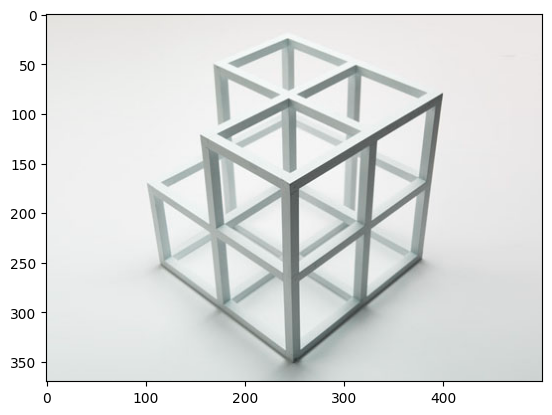

In [8]:
img = cv.imread("input_ex3.jpg")
plt.imshow(img)
plt.show()

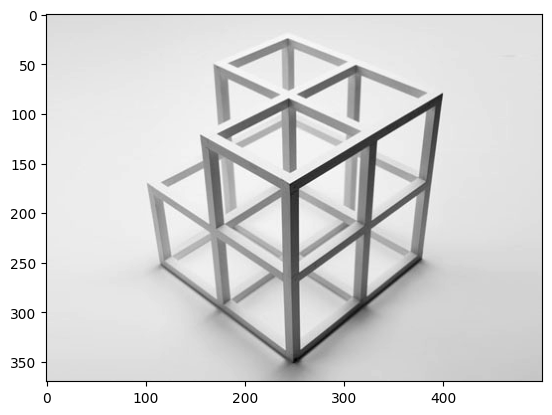

In [9]:
# Load the image in grayscale
image = cv.imread("input_ex3.jpg", cv.IMREAD_GRAYSCALE)
# Convert the image from BGR to RGB (cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) in Python) given
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
cv.imwrite('Gray.png',image)
plt.show()

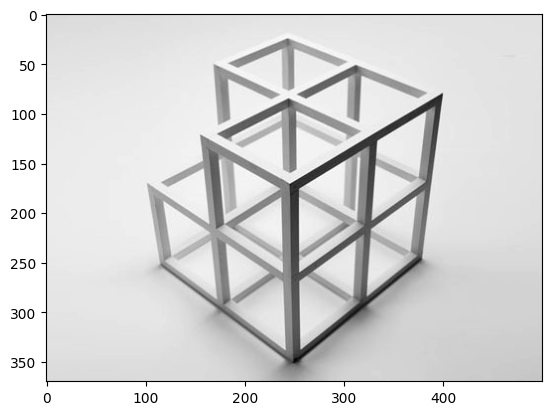

In [10]:
# The reason we divide by 255.0 is that grayscale images typically have pixel values in the range [0, 255], 
# where 0 represents black and 255 represents white.
# By dividing each pixel value by 255.0, we are scaling the values down to the range [0, 1]. 
# This normalization step ensures that the pixel values are represented as floating-point numbers between 0 and 1.
normalized_img = image/255.0
plt.imshow(normalized_img, cmap='gray')
cv.imwrite('normalized_image.png', normalized_img)
plt.show()

#### b) Apply a GoG filtering (from Assignment 2) to compute gradient images in x and y direction. Furthermore, compute the gradient magnitude.

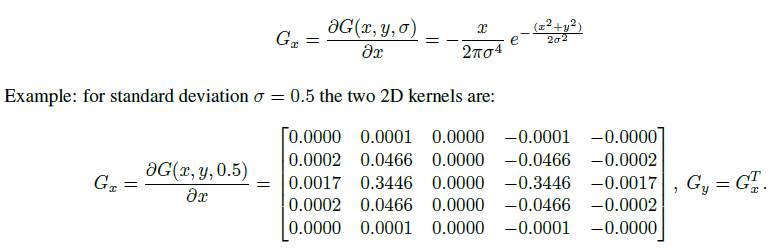

In [11]:
kernelsize = 5 #given kernalsize 5*5
standard_deviation = 0.5 #signma is 0.5 given
limit = int((kernelsize - 1) / 2)
x, y = np.meshgrid(np.arange(-limit, limit + 1), np.arange(-limit, limit + 1))

Here I break down the equation to make it easy in writting (a,b,c)

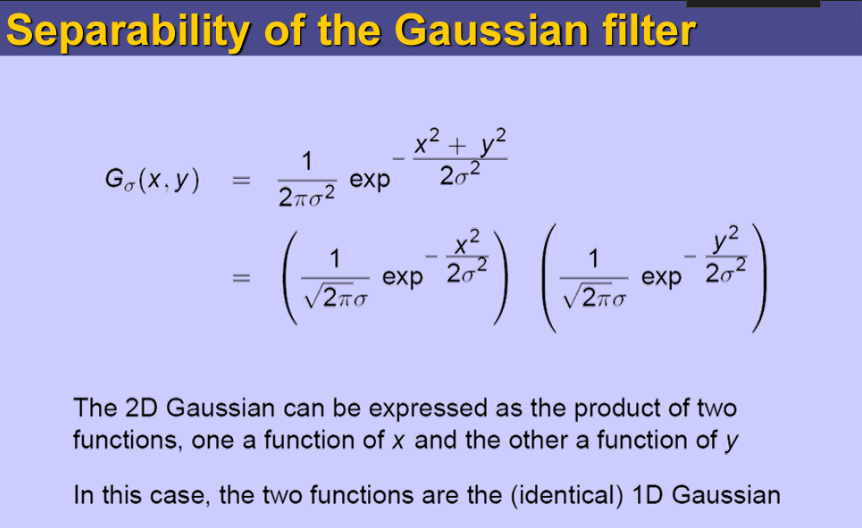

In [12]:
# Compute the Gaussian kernel values
a = -(x / (2 * math.pi * standard_deviation ** 4))
b = -((x ** 2 + y ** 2) / (2 * standard_deviation ** 2))
c = np.exp(b)
Gx = np.round(a * c, 4)
print("Gx = \n", Gx)
np.savetxt("Gx.txt", Gx, fmt="%0.4f", delimiter="\t")

Gx = 
 [[ 0.000e+00  1.000e-04 -0.000e+00 -1.000e-04 -0.000e+00]
 [ 2.000e-04  4.660e-02 -0.000e+00 -4.660e-02 -2.000e-04]
 [ 1.700e-03  3.446e-01 -0.000e+00 -3.446e-01 -1.700e-03]
 [ 2.000e-04  4.660e-02 -0.000e+00 -4.660e-02 -2.000e-04]
 [ 0.000e+00  1.000e-04 -0.000e+00 -1.000e-04 -0.000e+00]]


In [13]:
Gy = Gx.transpose() #Gy is transpose of Gx given
print("Gy = \n", Gy)
np.savetxt("Gy.txt", Gy, fmt="%0.4f", delimiter="\t")

Gy = 
 [[ 0.000e+00  2.000e-04  1.700e-03  2.000e-04  0.000e+00]
 [ 1.000e-04  4.660e-02  3.446e-01  4.660e-02  1.000e-04]
 [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
 [-1.000e-04 -4.660e-02 -3.446e-01 -4.660e-02 -1.000e-04]
 [-0.000e+00 -2.000e-04 -1.700e-03 -2.000e-04 -0.000e+00]]


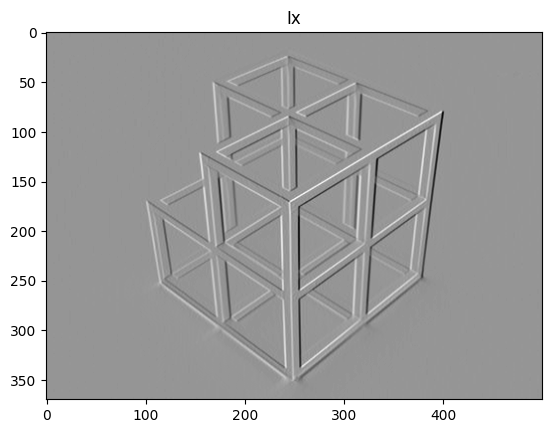

In [14]:
Ix = cv.filter2D(normalized_img, -1, Gx)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')
plt.axis()
plt.show()

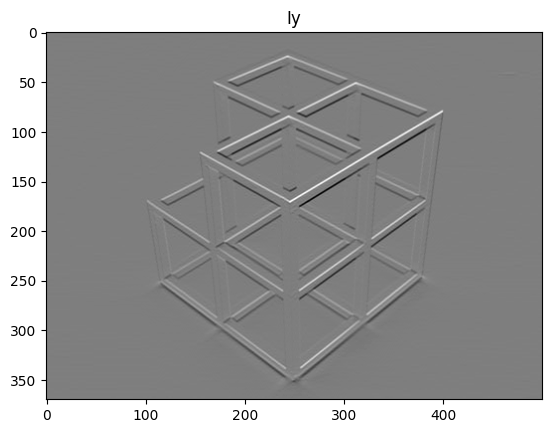

In [15]:
Iy = cv.filter2D(normalized_img, -1, Gy)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')
plt.axis()
plt.show()

Gradient Magnitude

Gradient Magnitude:
[[2.4109e-17 2.4109e-17 2.4109e-17 ... 2.4610e-17 2.4610e-17 2.4610e-17]
 [2.4109e-17 2.4109e-17 2.4109e-17 ... 2.4610e-17 2.4610e-17 2.4610e-17]
 [2.4109e-17 2.4109e-17 2.4109e-17 ... 2.4610e-17 2.4610e-17 2.4610e-17]
 ...
 [1.7259e-03 1.7259e-03 1.7259e-03 ... 7.4613e-06 1.9941e-17 1.9941e-17]
 [1.7259e-03 1.7259e-03 1.7259e-03 ... 8.7689e-07 1.9941e-17 1.9941e-17]
 [1.0098e-17 1.0098e-17 1.0098e-17 ... 1.9941e-17 1.9941e-17 1.9941e-17]]


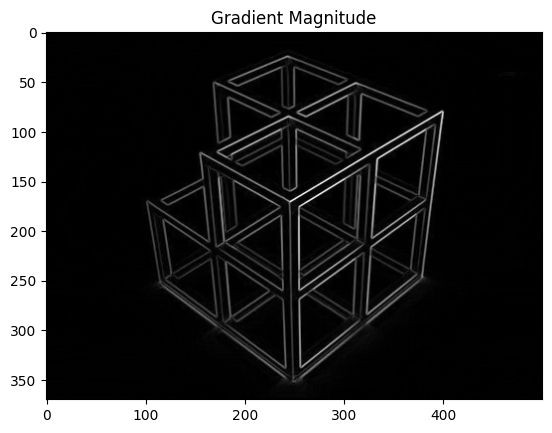

In [16]:
gradient_magnitude = np.sqrt((Ix**2 + Iy**2))
print("Gradient Magnitude:")
np.set_printoptions(precision=4)
print(gradient_magnitude)
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis()
plt.title('Gradient Magnitude')
plt.show()

#### c) Find and apply an appropriate threshold on the gradient magnitude in order to extract representative edge pixels. Plot the binary edge mask.

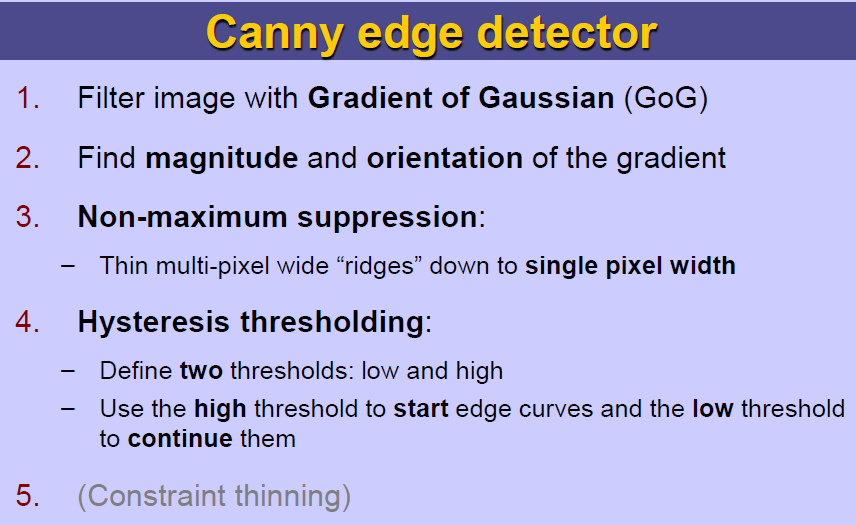

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


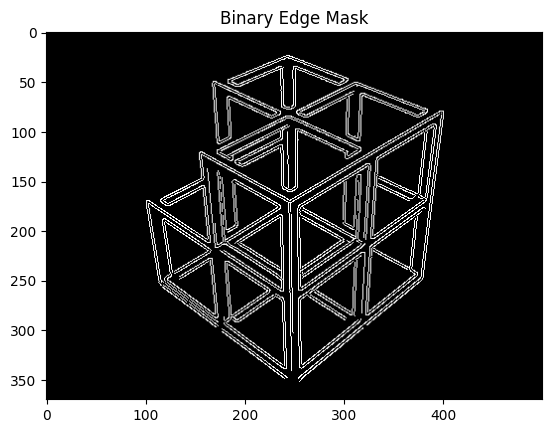

In [17]:
# Apply thresholding to extract representative edge pixels
low = 50
high = 100

# Apply Canny edge detection
edges = cv.Canny(np.uint8(gradient_magnitude * 255), low, high)  

# Create a binary edge mask
binary_mask = np.where(edges != 0, 1, 0)
print(binary_mask)

# Plot the binary edge mask
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Edge Mask')
plt.show()


In [18]:
binary_mask.shape

(370, 500)

#### d) Implement a function for Hough line detection:
#### i) The binary edge mask and the gradient images serve as inputs.
#### ii) A Hough voting array H and index arrays for the ranges of thetha and row are returned by the function.
#### iii) Hints: Use the polar line representation. Incorporate information about the gradient direction to speedup processing.

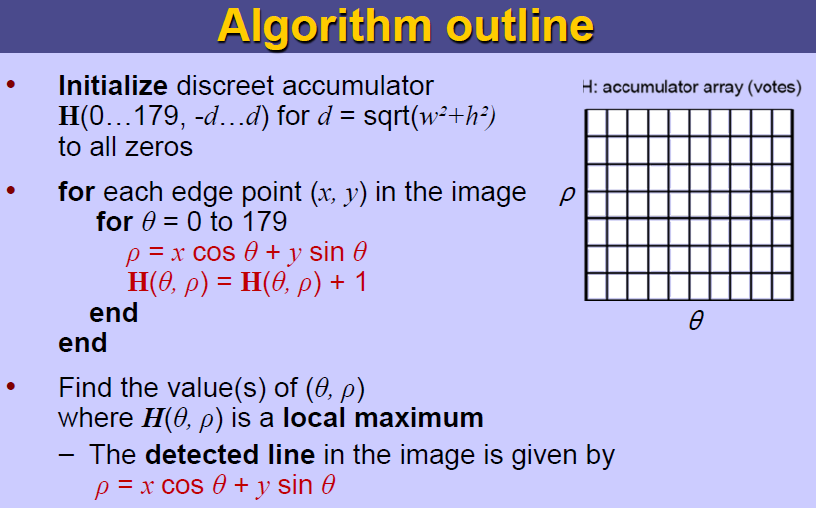

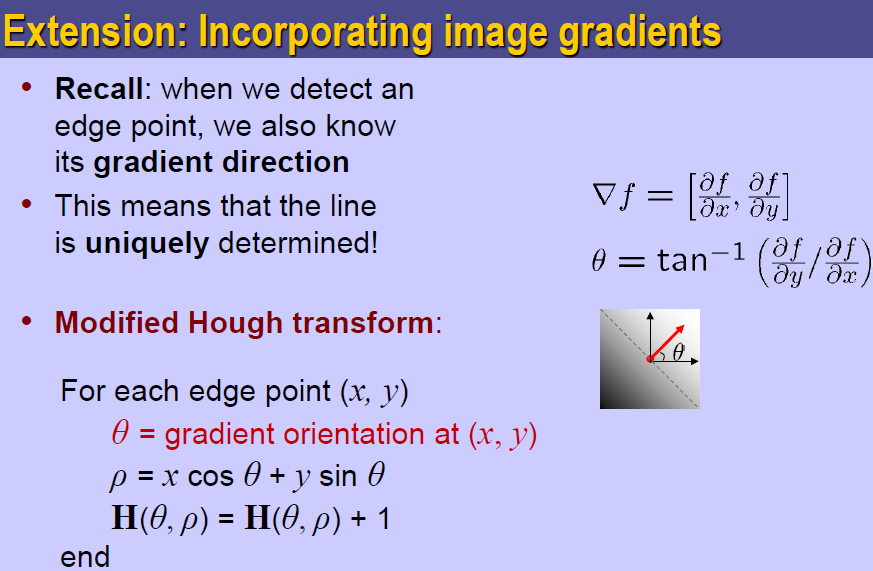

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_peaks
from skimage.feature import peak_local_max

# in this function it is implemented similar to the Algorithm from the PPT

def hough_line(binary_mask, gradient_magnitude):
    height, width = binary_mask.shape
    max_rho = np.sqrt(width**2 + height**2)
    num_theta = 180                                                            
    
    accumulator = np.zeros((num_theta, int(2 * max_rho + 1)), dtype=int)
    #theta_values = np.deg2rad(np.arange(num_theta))
    
    # Compute gradient direction
    gradient_direction = np.arctan2(Iy, Ix)

    # Perform Hough transform
    for y in range(height):
        for x in range(width):
            if binary_mask[y, x] > 0:
                # modified Hough transform
                for theta_index, theta in enumerate(theta_values):
                    rho = x * np.cos(theta) + y * np.sin(theta)                 # The detected line in the image is given by ρ= x cosθ+ ysin θ
                    rho_index = int(rho + max_rho)
                    accumulator[theta_index, rho_index] += 1
    
    # Find local maxima in the Hough voting array
    hough_peaks = peak_local_max(accumulator, min_distance=10, threshold_abs=50, num_peaks=10)
    return accumulator, theta_values, np.arange(-max_rho, max_rho + 1)



KeyboardInterrupt: 

* edges: Output of the edge detector.

* lines: A vector to store the coordinates of the start and end of the line.

* rho: The resolution parameter \rho in pixels.

* theta: The resolution of the parameter \theta in radians.

* threshold: The minimum number of intersecting points to detect a line.

Reference: https://towardsdatascience.com/tutorial-build-a-lane-detector-679fd8953132#127c
As a part of Special project we are implementing the same algo. 

#### e) Plot the resulting Hough voting array H.

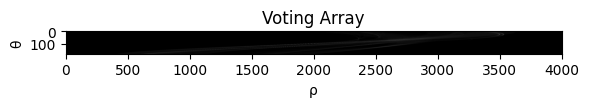

(1200, 1600)

In [ ]:
accumulator, theta_values, rho_values = hough_line(binary_mask, gradient_magnitude)

# Plot the Hough voting array
plt.imshow(accumulator, cmap='gray')
plt.xlabel('ρ')
plt.ylabel('θ')
plt.title('Voting Array')
plt.show()


binary_mask.shape
# gradient_magnitude.shape

# print(accumulator)


#### f) Find local maxima of H. You may use the built-in function houghpeaks.

I tried to use the houghpeaks built-in function from opencv and skimage.feature. But for some reason (I wouldn't figure out the errors. although I installed skimage.feature in a terminal) I was unable to do so. 

For such a reason I referred the below mentioned link and tried to implement it and was able to do it. 

Reference: https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array

In [ ]:
from skimage.feature import peak_local_max

accumulator, theta_values, rho_values = hough_line(binary_mask, gradient_magnitude)

# Find local maxima in the Hough voting array
hough_peaks = peak_local_max(accumulator, min_distance=10, threshold_abs=50, num_peaks=10)

# Print the local maxima coordinates
print("Local Maxima:")
for peak in hough_peaks:
    theta_index, rho_index = peak
    theta = theta_values[theta_index]
    rho = rho_values[rho_index]
    print("θ:", np.rad2deg(theta), "ρ:", rho)


Local Maxima:
θ: 98.0 ρ: -25.0
θ: 99.0 ρ: -49.0
θ: 97.0 ρ: -2.0
θ: 98.0 ρ: -89.0
θ: 99.0 ρ: -115.0
θ: 96.00000000000001 ρ: 20.0
θ: 122.0 ρ: -215.0
θ: 100.0 ρ: -78.0
θ: 118.00000000000001 ρ: -264.0
θ: 121.0 ρ: -197.0


In [ ]:
accumulator.shape

(180, 4001)

used skimage.feature import peak_local_max instead of from skimage.transform import hough_peaks

#### g) Plot the found extrema on top of your figure in step f).

min_distance: This parameter determines the minimum distance (in pixels) between detected peaks. It ensures that the returned peaks are separated by at least this distance. Adjusting this parameter can control the minimum spacing between the detected lines. A larger value can result in fewer detected lines, while a smaller value can detect more closely spaced lines.

num_peaks: This parameter specifies the maximum number of peaks to return

threshold_abs: This parameter sets the minimum value that a peak must have to be considered a valid peak. Adjusting this parameter can control the sensitivity of peak detection.

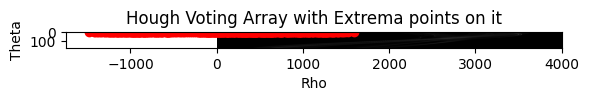

In [ ]:
from skimage.feature import peak_local_max

accumulator, theta_values, rho_values = hough_line(binary_mask, gradient_magnitude)
min_distance=10
num_peaks=10
threshold_abs=50

# Find local maxima in the Hough voting array
hough_peaks = peak_local_max(accumulator, min_distance,  num_peaks)

# Plot the Hough voting array with extrema
plt.imshow(accumulator, cmap='gray')
plt.xlabel('Rho')
plt.ylabel('Theta')
plt.title('Hough Voting Array with Extrema points on it')

# Plot the extrema points
for peak in hough_peaks:
    theta_index, rho_index = peak
    theta = theta_values[theta_index]
    rho = rho_values[rho_index]
    plt.plot(rho, theta, 'ro')

plt.show()


#### h) Use the built-in function houghlines to derive the corresponding line segments.

Reference: 

https://www.tutorialspoint.com/how-to-implement-probabilistic-hough-transform-in-opencv-python

https://www.youtube.com/watch?v=lhMXDqQHf9g&list=PLQVvvaa0QuDeETZEOy4VdocT7TOjfSA8a&index=5

over here I had refered how to use the houghlinesP in python



Source: https://docs.opencv.org/4.5.2/d9/db0/tutorial_hough_lines.html

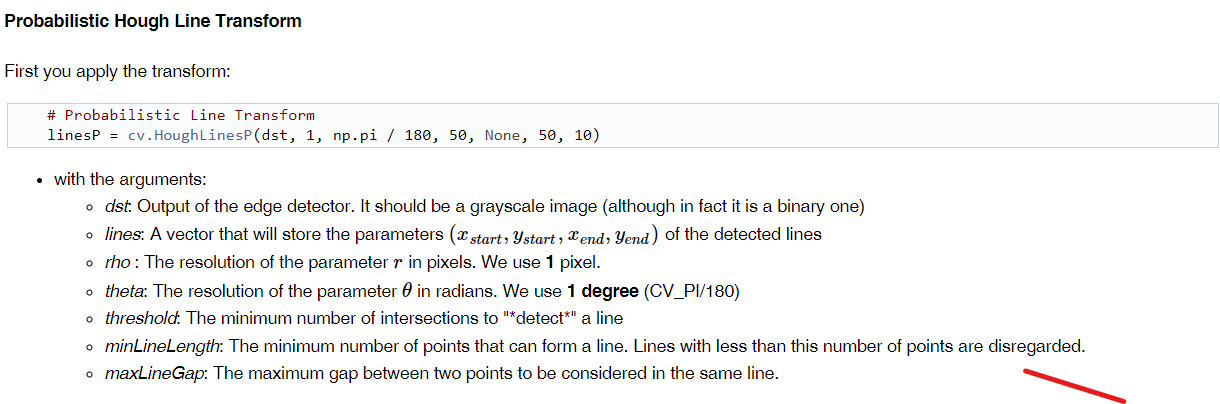

In [22]:
maxLineGap = 10

# Apply probabilistic Hough transform
lines = cv.HoughLinesP(edges, 1, np.pi/180, 50, 50, maxLineGap)

# Draw the detected lines on the original image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

lines.shape

(203, 1, 4)

#### i) Plot the lines on the figure of step a).

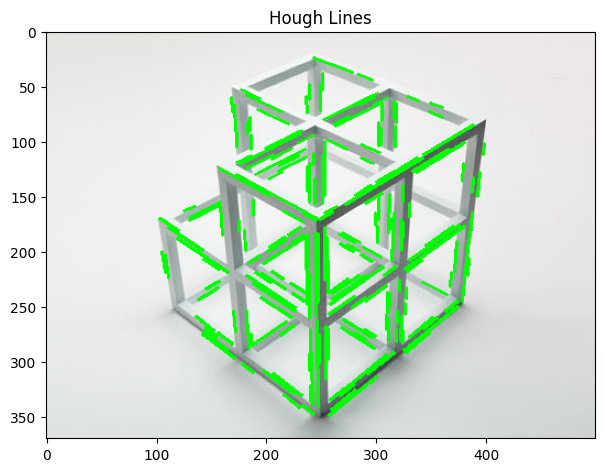

In [23]:
# Display the image with detected lines
plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Hough Lines')
plt.tight_layout()
plt.show()

Challeneges during task:

1. houghpeaks function was very difficult call. I tried to use the houghpeaks built-in function from opencv and skimage.feature. But for some reason (I wouldn't figure out the errors. although I installed skimage.feature in a terminal) I was unable to do so. 
